In [ ]:
import os
import tarfile
import numpy
import sklearn
import librosa
import librosa.display
import webrtcvad
import xgboost
import opensmile



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ke

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
# prompt: connect  to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:


# Create a directory for the audio files
os.makedirs('/content/drive/MyDrive/GoodnightMoonCompetition/train_audio', exist_ok=True)

# List of tar archive file paths
tar_files = [
    '/content/drive/MyDrive/GoodnightMoonCompetition/train_audio_1.tar.gz',
    '/content/drive/MyDrive/GoodnightMoonCompetition/train_audio_2.tar.gz',
    '/content/drive/MyDrive/GoodnightMoonCompetition/train_audio_3.tar.gz'
]

# Extract each tar archive into the train_audio directory
for tar_file_path in tar_files:
    if os.path.exists(tar_file_path):  # Check if the file exists
        with tarfile.open(tar_file_path, 'r:gz') as tar:
            tar.extractall(path='/content/drive/MyDrive/GoodnightMoonCompetition/train_audio')
            print(f"Extracted {tar_file_path} into train_audio/")
    else:
        print(f"File not found: {tar_file_path}")


KeyboardInterrupt: 

In [ ]:
# Built-ins
import joblib
from pathlib import Path

# Audio processing libraries
import librosa
import librosa.display
import opensmile
import webrtcvad

# Machine learning and data handling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier

# Visualization
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ke

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
DATA_PATH = Path("/content/drive/MyDrive/GoodnightMoonCompetition")
AUDIO_PATH = "/content/drive/MyDrive/GoodnightMoonCompetition/train_audio"

In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/GoodnightMoonCompetition/train_labels.csv")
print(f"Train labels shape: {labels.shape}")
labels.head()

Train labels shape: (38095, 2)


,filename,score
0,hgxrel.wav,0.0
1,ltbona.wav,0.0
2,bfaiol.wav,1.0
3,ktvyww.wav,1.0
4,htfbnp.wav,1.0


In [ ]:
metadata = pd.read_csv("/content/drive/MyDrive/GoodnightMoonCompetition/train_metadata.csv")
print(f"Train metadata shape: {metadata.shape}")
metadata.head()

Train metadata shape: (38095, 4)


,filename,task,expected_text,grade
0,hgxrel.wav,deletion,old,KG
1,ltbona.wav,sentence_repetition,he wouldnt go with his sister because he was t...,KG
2,bfaiol.wav,nonword_repetition,chav,KG
3,ktvyww.wav,sentence_repetition,ring the bell on the desk to get her attention,2
4,htfbnp.wav,blending,kite,KG


In [ ]:
df = labels.merge(metadata, on="filename", validate="1:1")
print(f"df shape: {df.shape}")
df.head()

df shape: (38095, 5)


,filename,score,task,expected_text,grade
0,hgxrel.wav,0.0,deletion,old,KG
1,ltbona.wav,0.0,sentence_repetition,he wouldnt go with his sister because he was t...,KG
2,bfaiol.wav,1.0,nonword_repetition,chav,KG
3,ktvyww.wav,1.0,sentence_repetition,ring the bell on the desk to get her attention,2
4,htfbnp.wav,1.0,blending,kite,KG


In [ ]:
def plot_waveform(filepath):
    # Load the audio file
    audio_data, sr = librosa.load(filepath, sr=None)

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

    return audio_data, sr

In [ ]:
def plot_spectrogram(audio_data, sr):
    # Generate the spectrogram
    S = librosa.stft(audio_data)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

In [ ]:
def voice_activity_detection(filepath, aggressiveness=2):
    vad = webrtcvad.Vad(aggressiveness)  # Aggressiveness from 0 to 3
    audio_data, sr = librosa.load(filepath, sr=16000)  # VAD prefers 16kHz audio
    audio_data = (audio_data * 32767).astype(np.int16)  # Scale to int16 for VAD

    frame_duration = 30  # Frame duration in ms
    frame_length = int(sr * frame_duration / 1000)

    # Collect VAD results
    vad_results = []
    for start in range(0, len(audio_data), frame_length):
        frame = audio_data[start : start + frame_length].tobytes()
        vad_results.append(vad.is_speech(frame, sr))

    # Plot VAD output
    time_axis = np.linspace(0, len(audio_data) / sr, num=len(vad_results))
    plt.figure(figsize=(10, 2))
    plt.plot(time_axis, vad_results, label="VAD Output")
    plt.title("Voice Activity Detection (VAD) Output")
    plt.xlabel("Time (s)")
    plt.ylabel("Speech Detected")
    plt.ylim(-0.1, 1.1)
    plt.show()

In [ ]:
def analyze_audio(filepath):
    print("Plotting waveform...")
    audio_data, sr = plot_waveform(filepath)

    print("Plotting spectrogram...")
    plot_spectrogram(audio_data, sr)

    print("Performing Voice Activity Detection...")
    voice_activity_detection(filepath)

In [ ]:
incorrect_deletion = "gpksml.wav"

df[df.filename == incorrect_deletion]

,filename,score,task,expected_text,grade
9468,gpksml.wav,0.0,deletion,hair,KG


Plotting waveform...


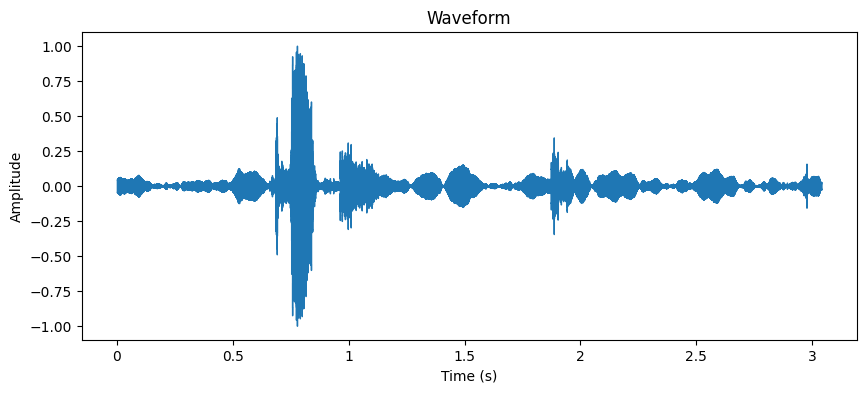

Plotting spectrogram...


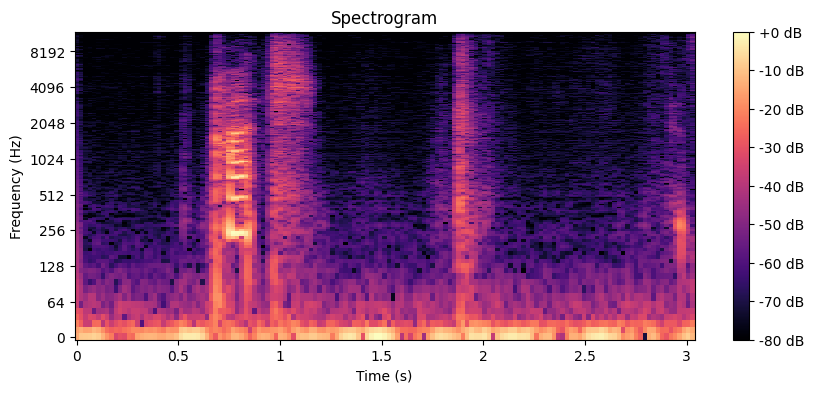

Performing Voice Activity Detection...


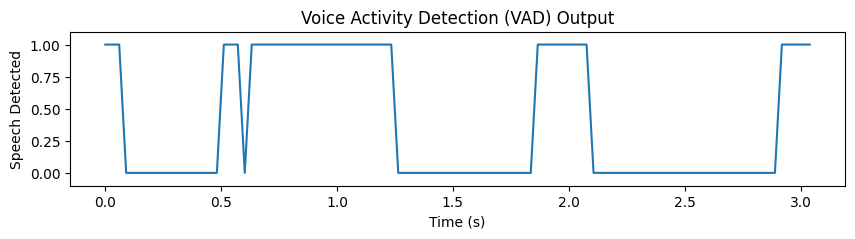

In [ ]:
analyze_audio("/content/drive/MyDrive/GoodnightMoonCompetition/train_audio/gpksml.wav")

In [ ]:
correct_deletion = "faudzc.wav"

df[df.filename == correct_deletion]

,filename,score,task,expected_text,grade
26274,faudzc.wav,1.0,deletion,hair,KG


Plotting waveform...


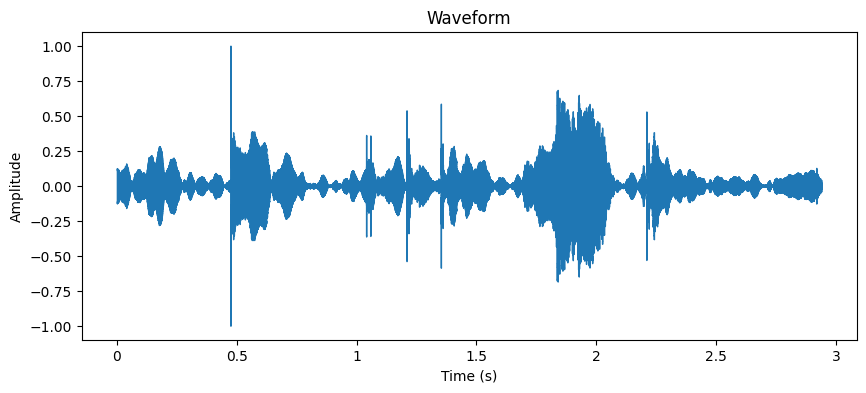

Plotting spectrogram...


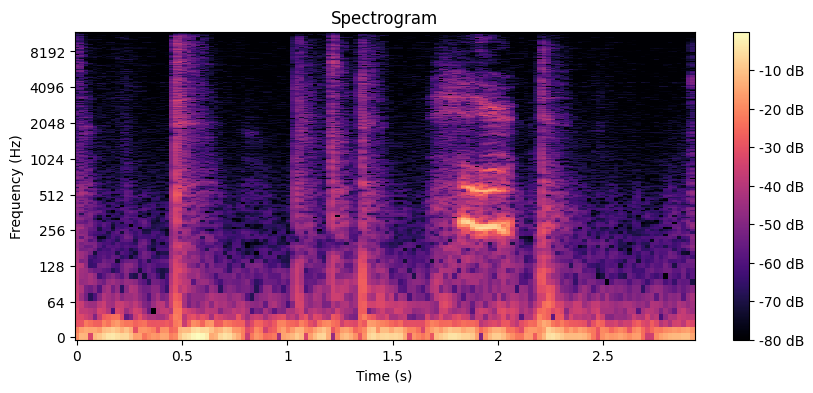

Performing Voice Activity Detection...


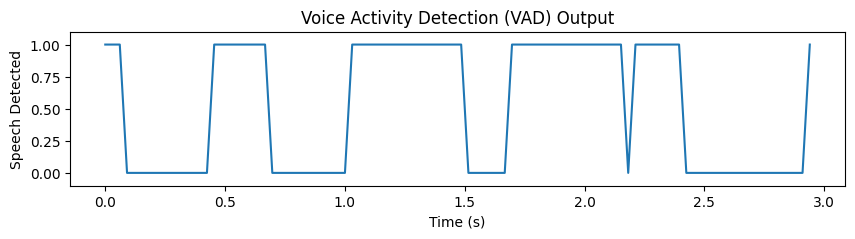

In [ ]:
analyze_audio("/content/drive/MyDrive/GoodnightMoonCompetition/train_audio/faudzc.wav")

In [ ]:
import sklearn

In [ ]:
# # Initialize OpenSMILE with eGeMAPS configuration for extracting features
# smile = opensmile.Smile(
#     feature_set=opensmile.FeatureSet.eGeMAPSv02,  # Use eGeMAPS for feature extraction
#     feature_level=opensmile.FeatureLevel.Functionals,  # Extract summary statistics
# )

In [ ]:
# import os # Make sure os module is imported

# feature_list = []
# for filename in tqdm(df.filename, desc="Extracting OpenSMILE Features", unit="file"):
#     # Use os.path.join to create the file path
#     filepath = os.path.join(AUDIO_PATH, filename)
#     features = smile.process_file(filepath)  # Extract features for each file
#     feature_list.append(features.mean(axis=0))  # Take the mean across time for stability

Extracting OpenSMILE Features: 100%|██████████| 38095/38095 [2:02:08<00:00,  5.20file/s]


In [ ]:
# # prompt: CREATE A DATAFRAME FROM FEATURELIST AND SAVE AS CSV WITH INDEX index=df.filename)

# import pandas as pd

# # Assuming 'feature_list' and 'df' are defined as in your provided code

# # Create the DataFrame
# feature_df = pd.DataFrame(feature_list)

# # Set the index to filenames
# feature_df.index = df.filename

# # Save the DataFrame to a CSV file in your Google Drive
# feature_df.to_csv("/content/drive/MyDrive/GoodnightMoonCompetition/features.csv", index=True)

In [ ]:
feature_df = pd.read_csv("/content/drive/MyDrive/GoodnightMoonCompetition/features.csv", index_col=0)

In [ ]:
# Convert extracted features to DataFrame
X = pd.DataFrame(feature_df, index=df.filename)

# Set up target variable
y = df.score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (30476, 88)
Test set size: (7619, 88)


In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric="logloss")

calibrated_model = CalibratedClassifierCV(xgb_model, cv=3)
calibrated_model.fit(X_train, y_train)

# Make predictions and evaluate using log loss
y_pred_proba = calibrated_model.predict_proba(X_test)[
    :, 1
]  # Probability of 'correct' (class 1)
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss on the test set: {logloss}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
calibrated_model.fit(X, y)

In [ ]:
# prompt: SAVE CALIBARATED MODEL AS A JOBLIB FILE

# Save the calibrated model as a joblib file
joblib.dump(calibrated_model, '/content/drive/MyDrive/GoodnightMoonCompetition/calibrated_xgb_model.joblib')

In [ ]:
# prompt: use grid search to find the best hyperparameters for the xgb classifier

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# Change 'base_estimator__' to 'estimator__'
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    # Add other hyperparameters you want to tune
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=CalibratedClassifierCV(xgb_model, cv=3),  # Use CalibratedClassifierCV
    param_grid=param_grid,
    scoring='neg_log_loss',  # Use neg_log_loss for scoring
    cv=5,  # Use 5-fold cross-validation
    verbose=2,  # Increase verbosity to monitor progress
    n_jobs=-1 #use all cores
)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss on the test set with best model: {logloss}")

# Save the best model
joblib.dump(best_model, '/content/drive/MyDrive/GoodnightMoonCompetition/best_calibrated_xgb_model.joblib')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 7, 'estimator__n_estimators': 200}
Log Loss on the test set with best model: 0.6004325230154853


['/content/drive/MyDrive/GoodnightMoonCompetition/best_calibrated_xgb_model.joblib']

In [ ]:
# prompt: use random search to find best paramters

import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
import joblib

# Assuming X, y, X_train, X_test, y_train, y_test are defined as in your previous code

def objective(params):
    # Initialize the model with the given parameters
    xgb_model = XGBClassifier(n_estimators=int(params['n_estimators']),
                              max_depth=int(params['max_depth']),
                              learning_rate=params['learning_rate'],
                              random_state=42, eval_metric="logloss")

    # Calibrate the model
    calibrated_model = CalibratedClassifierCV(xgb_model, cv=3)
    calibrated_model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred_proba = calibrated_model.predict_proba(X_test)[:, 1]
    logloss_score = log_loss(y_test, y_pred_proba)

    return logloss_score

def random_search(param_dist, n_iter=10):  # Reduced n_iter for faster testing
    best_params = None
    best_score = float('inf')  # Initialize with positive infinity

    for _ in range(n_iter):
        params = {}
        for param, dist in param_dist.items():
            params[param] = random.choice(dist)

        score = objective(params)

        if score < best_score:
            best_score = score
            best_params = params
            print(f"New best score: {best_score}, Params: {best_params}")  # Print progress

    return best_params, best_score

# Define the search space (parameter distributions)
param_dist = {
    'n_estimators': [50, 100, 150, 200],  # More estimators can lead to overfitting
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.005, 0.01, 0.05, 0.1]
}

# Run random search
best_params, best_score = random_search(param_dist, n_iter=20) # Increased n_iter

print("Best parameters:", best_params)
print("Best Log Loss:", best_score)

# Train final model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
calibrated_best_model = CalibratedClassifierCV(best_xgb_model, cv=3)
calibrated_best_model.fit(X,y) #Train with all data

#Save the model
joblib.dump(calibrated_best_model, '/content/drive/MyDrive/GoodnightMoonCompetition/random_search_best_model.joblib')

New best score: 0.6376566928473023, Params: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.005}
New best score: 0.6275211358288946, Params: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01}
New best score: 0.6199233957791761, Params: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}
New best score: 0.6095134664624409, Params: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05}
New best score: 0.6025966708841379, Params: {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.1}
Best parameters: {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.1}
Best Log Loss: 0.6025966708841379


['/content/drive/MyDrive/GoodnightMoonCompetition/random_search_best_model.joblib']

In [ ]:
df = labels.merge(metadata, on="filename", validate="1:1")
print(f"df shape: {df.shape}")
df.head()

df shape: (38095, 5)


,filename,score,task,expected_text,grade
0,hgxrel.wav,0.0,deletion,old,KG
1,ltbona.wav,0.0,sentence_repetition,he wouldnt go with his sister because he was t...,KG
2,bfaiol.wav,1.0,nonword_repetition,chav,KG
3,ktvyww.wav,1.0,sentence_repetition,ring the bell on the desk to get her attention,2
4,htfbnp.wav,1.0,blending,kite,KG


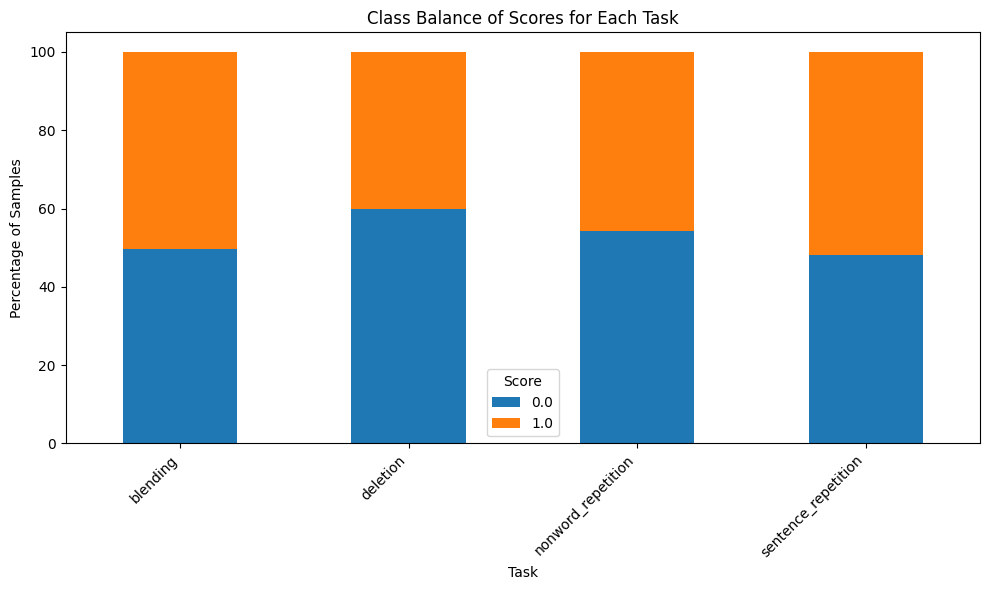

In [ ]:
# prompt: check the score class balance (1, 0) for each task in the original dataset catagorised by task and plot on chart

import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (assuming it's named 'df')
# Replace 'your_file.csv' with the actual path to your CSV file
#df = pd.read_csv("/content/drive/MyDrive/GoodnightMoonCompetition/train_labels.csv")

# Group by 'task' and 'score', then count occurrences
task_score_counts = df.groupby(['task', 'score']).size().unstack(fill_value=0)

# Calculate the percentage of each score for each task
task_score_percentages = task_score_counts.div(task_score_counts.sum(axis=1), axis=0) * 100

# Create the bar plot
task_score_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Class Balance of Scores for Each Task')
plt.xlabel('Task')
plt.ylabel('Percentage of Samples')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Score')
plt.tight_layout()
plt.show()

In [ ]:
pip install bayesian-optimization

In [ ]:
import bayes_opt

In [ ]:
# prompt: use BO to find best paramters

from bayes_opt import BayesianOptimization
import numpy as np

# Define the objective function (same as before)
def objective(n_estimators, max_depth, learning_rate):
    # Ensure parameters are integers where necessary
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)

    xgb_model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42, eval_metric="logloss")
    calibrated_model = CalibratedClassifierCV(xgb_model, cv=3)
    calibrated_model.fit(X_train, y_train)
    y_pred_proba = calibrated_model.predict_proba(X_test)[:, 1]
    logloss_score = log_loss(y_test, y_pred_proba)
    return -logloss_score # BayesianOptimization maximizes, so we negate


# Define the parameter bounds
pbounds = {
    'n_estimators': (100, 500),
    'max_depth': (3, 20),
    'learning_rate': (0.005, 0.1)
}

# Initialize the optimizer
optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=42,
)

# Perform the optimization
optimizer.maximize(init_points=5, n_iter=10) # Adjust init_points and n_iter

# Print the best parameters and score
print(optimizer.max)

# Train the best model
best_params = optimizer.max['params']
best_xgb_model = XGBClassifier(n_estimators=int(best_params['n_estimators']),
                              max_depth=int(best_params['max_depth']),
                              learning_rate=best_params['learning_rate'],
                              random_state=42, eval_metric='logloss')

calibrated_best_model = CalibratedClassifierCV(best_xgb_model, cv=3)
calibrated_best_model.fit(X, y)  # Train on the full dataset

# Save the best model
joblib.dump(calibrated_best_model, '/content/drive/MyDrive/GoodnightMoonCompetition/bayesian_optimization_best_model.joblib')

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/bayes_opt/target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | -0.6033   | 0.04058   | 19.16     | 392.8     |
| 2         | -0.6069   | 0.06187   | 5.652     | 162.4     |
| 3         | -0.6095   | 0.01052   | 17.72     | 340.4     |
| 4         | -0.6064   | 0.07227   | 3.35      | 488.0     |
| 5         | -0.6028   | 0.08408   | 6.61      | 172.7     |
| 6         | -0.6031   | 0.05123   | 19.31     | 393.1     |
| 7         | -0.6109   | 0.008881  | 18.24     | 399.9     |
| 8         | -0.6054   | 0.02453   | 8.5       | 175.8     |
| 9         | -0.6461   | 0.005972  | 3.061     | 171.3     |
| 10        | -0.6022   | 0.08566   | 9.413     | 172.1     |
| 11        | -0.6037   | 0.02977   | 15.82     | 394.2     |
| 12        | -0.6017   | 0.07054   | 14.48     | 390.3     |
| 13        | -0.6017   | 0.07349   | 11.84     | 392.9     |
| 14        | -0.6003   | 0.07611   | 10.67     | 389.2     |
| 15        | -0.6019   | 0.06703   | 13.2      | 386.0     |
{'target': -0.6003184726289549, 'params': {'learning_rate': 0.07611002

['/content/drive/MyDrive/GoodnightMoonCompetition/bayesian_optimization_best_model.joblib']

In [ ]:
import os

In [ ]:
# prompt: use wav2vec to transcribe the audio in train_audio and erite back to df as column "transcribed audio". ensure that the filename is used as reference for the train_audio folder. Also add tqdm tp measure progress

!pip install transformers torch

import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
from tqdm import tqdm
import librosa
import pandas as pd
import os

# Load the pre-trained model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Ensure device is set correctly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

AUDIO_PATH = "/content/drive/MyDrive/GoodnightMoonCompetition/train_audio"
df = labels.merge(metadata, on="filename", validate="1:1") # Assuming df is defined in your original code


transcribed_audio_list = []

for filename in tqdm(df['filename'], desc="Transcribing audio"):
    filepath = os.path.join(AUDIO_PATH, filename)

    try:
        # Load the audio file
        audio_input, sr = librosa.load(filepath, sr=16000) # wav2vec2 usually works with 16kHz

        # Tokenize
        input_values = processor(audio_input, return_tensors="pt", sampling_rate=sr).input_values.to(device)

        # Perform inference
        with torch.no_grad():
            logits = model(input_values).logits

        # Decode the predictions
        predicted_ids = torch.argmax(logits, dim=-1)
        transcription = processor.batch_decode(predicted_ids)[0]

        transcribed_audio_list.append(transcription)
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        transcribed_audio_list.append("")  # Append empty string if error

# Add the transcriptions to the DataFrame
df['transcribed_audio'] = transcribed_audio_list

print(df.head())

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Transcribing audio: 100%|██████████| 38095/38095 [6:29:25<00:00,  1.63it/s]

     filename  score                 task  \
0  hgxrel.wav    0.0             deletion   
1  ltbona.wav    0.0  sentence_repetition   
2  bfaiol.wav    1.0   nonword_repetition   
3  ktvyww.wav    1.0  sentence_repetition   
4  htfbnp.wav    1.0             blending   

                                       expected_text grade  \
0                                                old    KG   
1  he wouldnt go with his sister because he was t...    KG   
2                                               chav    KG   
3     ring the bell on the desk to get her attention     2   
4                                               kite    KG   

                                  transcribed_audio  
0                                                NE  
1        HE WAN GOLDEN SISTER KISTLE WAS KIND AND A  
2                                              SONG  
3  WINGED THE BELT ON THE DESK TO GET HER ATTENTION  
4                                           YECOTEN  


In [ ]:
# prompt: save the transcribed audio to csv

# Assuming 'df' is your DataFrame with the 'transcribed_audio' column
df.to_csv('/content/drive/MyDrive/GoodnightMoonCompetition/transcribed_audio.csv', index=False)

In [ ]:
df.head()

,filename,score,task,expected_text,grade
0,hgxrel.wav,0.0,deletion,old,KG
1,ltbona.wav,0.0,sentence_repetition,he wouldnt go with his sister because he was t...,KG
2,bfaiol.wav,1.0,nonword_repetition,chav,KG
3,ktvyww.wav,1.0,sentence_repetition,ring the bell on the desk to get her attention,2
4,htfbnp.wav,1.0,blending,kite,KG


In [ ]:
import os
import pandas as pd
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import random
import shutil

# Mount Google Drive (if you're using Google Colab)
drive.mount('/content/drive')


# Set paths
audio_folder_path = "/content/drive/MyDrive/GoodnightMoonCompetition/train_audio"  # Google Drive path to the folder with audio files
sample_folder_path = "/content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample"  # Folder to store sampled files


# Create a sample folder in Google Drive if it doesn't exist
if not os.path.exists(sample_folder_path):
    os.makedirs(sample_folder_path)

# Load your DataFrame (replace this with loading your actual df)
# Example: df = pd.read_csv('your_dataframe.csv')
# df = pd.read_csv('file_list.csv')

# Assuming your DataFrame has a column 'filename' that contains the filenames of interest
# Create a sample of your DataFrame (you can adjust sample size)
sample_size = 50  # Adjust sample size as needed
df_sample = df.sample(n=sample_size)

# Get the list of filenames from the DataFrame sample
sample_filenames = df_sample['filename'].tolist()

# Iterate through the sample and find corresponding audio files in the source folder
for filename in sample_filenames:
    source_file_path = os.path.join(audio_folder_path, filename)
    if os.path.exists(source_file_path):
        # Copy the file to the new sample folder
        destination_file_path = os.path.join(sample_folder_path, filename)
        shutil.copy(source_file_path, destination_file_path)
        print(f"Copied {filename} to {sample_folder_path}")
    else:
        print(f"File {filename} not found in {audio_folder_path}")

print("Sample creation complete.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied anfpiy.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied gtnodj.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied kofekf.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied fmydds.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied hqwqkf.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied jjrsbe.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied izafoi.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied aygidt.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied bzqeex.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audio_sample
Copied fbrsza.wav to /content/drive/MyDrive/GoodnightMoonCompetition/train_audi

In [ ]:
df_sample.head()

,filename,score,task,expected_text,grade
28332,anfpiy.wav,1.0,nonword_repetition,vugoobuhcheen,1
26801,gtnodj.wav,0.0,deletion,room,KG
16115,kofekf.wav,0.0,sentence_repetition,alex could hear the bird sing a song in the ne...,KG
4855,fmydds.wav,0.0,deletion,rain,KG
37819,hqwqkf.wav,0.0,blending,baby,KG


In [ ]:
import pandas as pd
import json

# Group by 'task' and organize the exercises for each task, ensuring expected_text is unique
tasks_dict = {}

# Iterate through each unique task
for task in df['task'].unique():
    # Filter the DataFrame for this task
    task_df = df[df['task'] == task]

    # Drop duplicates based on 'expected_text' to ensure uniqueness
    task_df_unique = task_df.drop_duplicates(subset='expected_text')

    # Create a list of exercises (expected text and filenames) for this task
    exercises = []
    for _, row in task_df_unique.iterrows():
        exercise = {
            'expected_text': row['expected_text']
        }
        exercises.append(exercise)

    # Store the list of exercises for this task
    tasks_dict[task] = exercises

# Save the extracted tasks and exercises to a JSON file
output_file = DATA_PATH/'tasks_exercises_unique.json'  # Change this to your desired path
with open(output_file, 'w') as f:
    json.dump(tasks_dict, f, indent=4)

print(f"Tasks and exercises have been saved to {output_file}.")


Tasks and exercises have been saved to /content/drive/MyDrive/GoodnightMoonCompetition/tasks_exercises_unique.json.
